In [70]:
import numpy as np
import AR
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["axes.labelpad"] = -1.7


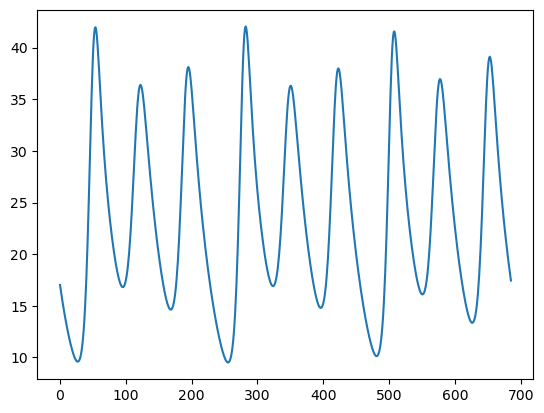

In [73]:
data = np.load("../lorenz/lorenz100sec0dump_dt=0.01.npy")[2, :686]
plt.plot(data)
order = 500
ar = AR.ARModel(order, 0.8)

  0%|          | 0/49 [00:00<?, ?it/s]

9


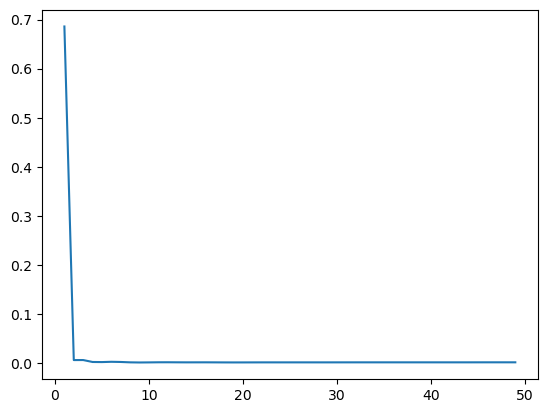

In [82]:
ar.gridSearch_order(np.arange(1, 50, 1), data)

0.0001


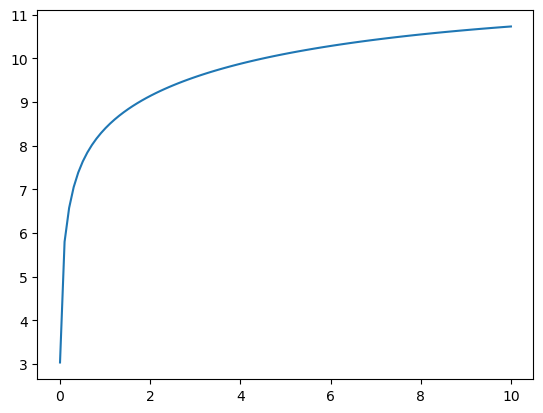

In [75]:
ar.gridSearch_alpha(np.linspace(0.0001, 10, num=100), data)

2.076859522983605e-05
0.0728657105069089


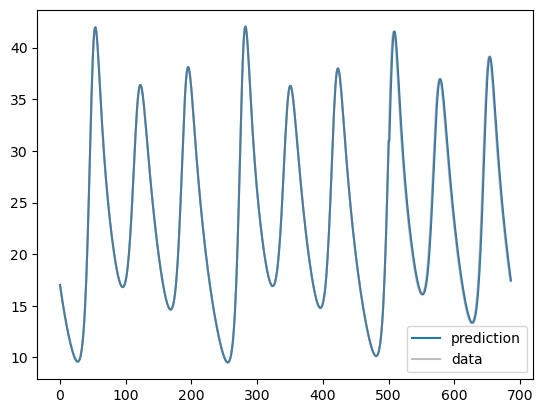

In [76]:
plt.figure(dpi=100)
ar.fit(data)    
print(ar.score)
print(ar.model.coef_.sum())
plt.plot(data, alpha=0.5, c="gray", label="data")
plt.legend()    

In [77]:
remain = 1 - ar.model.coef_.sum()
one_coef = ar.model.coef_ + remain/len(ar.model.coef_)
remain

0.9271342894930911

In [78]:
pre_data = np.load("../lorenz/lorenz100sec1000dump_dt=0.01.npy")[0, :]
pre = np.zeros(pre_data.shape[0])
pre[:order] = pre_data[:order]
for i in range(order, pre_data.shape[0]):
    pre[i] = ar.model.intercept_ + np.dot(ar.model.coef_ , pre[i-order:i]) + np.random.normal(0, 1e-2)

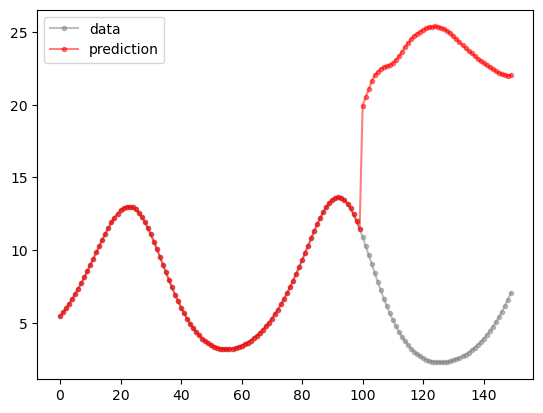

In [81]:
plt.plot(pre_data[400:550], alpha=0.5,marker=".", c="gray", label="data")
plt.plot(pre[400:550], alpha=0.5, c="red",marker=".", label="prediction")
plt.legend()